In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import sys
import copy
import random
import math
import numpy as np
import scipy as sp
import pandas as pd

/opt/apps/Anaconda3/2019.03/envs/powerai16_ibm/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data=pd.read_csv('training.txt', delimiter='\s+', index_col=False, header = None)

In [3]:
nn = MLPRegressor(
    hidden_layer_sizes=(80,3),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
    learning_rate='adaptive', learning_rate_init=0.0009, power_t=0.7, max_iter=200, shuffle=True,
    random_state=9, tol=0.000001, verbose=True, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.25, beta_1=0.972, beta_2=0.9, epsilon=1e-9)

In [4]:
inputs=data.iloc[:,:14]
outputs=data.iloc[:,14]
print(inputs)
print(outputs)

        0    1     2    3     4    5     6    7     8    9     10   11    12  \
0     1000  192   500  128   400  160   700  160   200  256   800  192   400   
1      800  160   600  160   300   64   800  384   700  288   500  192   100   
2      400  128   100   32   700  256  1000  288  1000  288   100  288   500   
3      200  256   900  192   800  160   700  192   600  384   200  224   300   
4      100  288   200  256   900  256   700   32   900  160   400  192   400   
5      700  224   800  192   400   64   200  384   300   96   600  384   100   
6      800  160   700  224   600   32   700  128   100  320   500  128   700   
7     1000   64   500  288   600  384   100   64   200  352   100  320   600   
8      700  288   200  192   900   64   200  352   300  352   900  128  1000   
9      600   32   300  320   900  224   600  192   700  128   400  384   300   
10     200  384   400  224   900  288   700  288   600   64   200  160   200   
11     900  384   800  224   700  320   

In [5]:
x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, random_state=9)

In [6]:
print(len(x_train))
print(len(x_test))

7500
2500


In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
x_train = scaler.transform(x_train)

In [10]:
x_test=scaler.transform(x_test)

In [11]:
print(len(x_test))

2500


In [12]:
n_fit=nn.fit(x_train,y_train)

Iteration 1, loss = 0.06892600
Iteration 2, loss = 0.01927881
Iteration 3, loss = 0.00934650
Iteration 4, loss = 0.00737728
Iteration 5, loss = 0.00496788
Iteration 6, loss = 0.00374871
Iteration 7, loss = 0.00324033
Iteration 8, loss = 0.00286798
Iteration 9, loss = 0.00251586
Iteration 10, loss = 0.00224281
Iteration 11, loss = 0.00203597
Iteration 12, loss = 0.00189253
Iteration 13, loss = 0.00179287
Iteration 14, loss = 0.00172136
Iteration 15, loss = 0.00166535
Iteration 16, loss = 0.00161247
Iteration 17, loss = 0.00157683
Iteration 18, loss = 0.00153759
Iteration 19, loss = 0.00149840
Iteration 20, loss = 0.00146361
Iteration 21, loss = 0.00142802
Iteration 22, loss = 0.00139393
Iteration 23, loss = 0.00136992
Iteration 24, loss = 0.00133595
Iteration 25, loss = 0.00130391
Iteration 26, loss = 0.00127100
Iteration 27, loss = 0.00124433
Iteration 28, loss = 0.00121434
Iteration 29, loss = 0.00119621
Iteration 30, loss = 0.00117534
Iteration 31, loss = 0.00115534
Iteration 32, los

In [13]:
nn.score(x_train,y_train)
the_training_score = nn.score(x_train,y_train)

In [14]:
nn.score(x_test,y_test)
the_testing_score = nn.score(x_test,y_test)

In [15]:
nn.loss_

0.0005364431170783745

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure()
epochs = range(0,len(nn.loss_curve_))
loss_thermisto = nn.loss_curve_
plt.plot(epochs,nn.loss_curve_)
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
fig.savefig('loss_history_thermisto.png')
#fig = plt.figure()
#plt.plot(epochs,nn.validation_scores_)
#plt.show()

<Figure size 640x480 with 1 Axes>

In [17]:
y_predicted_train=nn.predict(x_train)
y_predicted_train=np.array(y_predicted_train)
y_real_train=np.array(y_train)
y_predicted_train.reshape([len(y_predicted_train),1])
y_real_train.reshape([len(y_real_train),1])
np.savetxt('Predicted_train_thermisto.txt',y_predicted_train)
np.savetxt('Actual_train_thermisto.txt',y_real_train)
y_real_test=np.array(y_test)
y_predicted_test = np.array(nn.predict(x_test))
np.savetxt('Actual_test_thermisto.txt',y_real_test.reshape([len(y_real_test),1]))
np.savetxt('Predicted_test_thermisto.txt',y_predicted_test.reshape([len(y_predicted_test),1]))

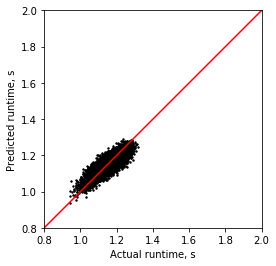

In [18]:
fig = plt.figure()
xyrange = [0.8,2.0]
plt.scatter(y_real_train,y_predicted_train,s=2,c='k')
plt.plot(xyrange,xyrange,'r')
plt.xlabel('Actual runtime, s')
plt.ylabel('Predicted runtime, s')
plt.axis('square')
plt.axis([xyrange[0],xyrange[1],xyrange[0],xyrange[1]])
plt.show()
fig.savefig('Thermisto_training.png')

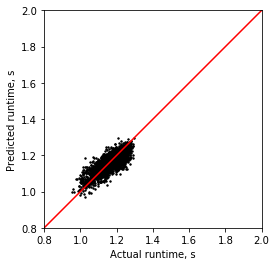

In [19]:
fig = plt.figure()
xyrange = [0.8,2.0]
plt.scatter(y_real_test,y_predicted_test,s=2,c='k')
plt.plot(xyrange,xyrange,'r')
plt.xlabel('Actual runtime, s')
plt.ylabel('Predicted runtime, s')
plt.axis('square')
plt.axis([xyrange[0],xyrange[1],xyrange[0],xyrange[1]])
plt.show()
fig.savefig('Thermisto_testing.png')

In [20]:
data_cas=pd.read_csv('training_cascades.txt', delimiter='\s+', index_col=False, header = None)

In [21]:
nn = MLPRegressor(
    hidden_layer_sizes=(80,3),  activation='relu', solver='adam', alpha=0.005, batch_size=400,
    learning_rate='adaptive', learning_rate_init=0.0009, power_t=0.7, max_iter=200, shuffle=True,
    random_state=9, tol=0.000001, verbose=True, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.25, beta_1=0.972, beta_2=0.9, epsilon=1e-9)

In [22]:
inputs_cas=data_cas.iloc[:,:14]
outputs_cas=data_cas.iloc[:,14]
print(inputs_cas)
print(outputs_cas)

        0    1     2    3     4    5     6    7     8    9     10   11    12  \
0      300  288   200  320   300  192   600   96   100  320   600   32   700   
1      900   32   700   96  1000  256   500  320   300  384   600  320   300   
2      400  192   200   96  1000  192   400  192   100  128   800  128   400   
3      900  320   600  160   900  288  1000   32   900  352   400   96   700   
4      900   96   500  224   900   32  1000   96   900  320   300   64   500   
5      300  288   500   32  1000  352   800  256   500   32   400  320   400   
6      500  352  1000  256   600  256   900  224   700  256   900  352   700   
7      100  192   500  256   800  192   100  288   700   32   200  320   200   
8     1000  192   800  384   100  224   100  320   200   96   800  160   900   
9     1000  160   400  320   900  352   900  192   800  256   100  224   900   
10     700   32   200  288   400  128   300  320   700   64   800  320   500   
11     100  320   100  192   300  320   

In [23]:
x_train_cas, x_test_cas, y_train_cas, y_test_cas = train_test_split(inputs_cas, outputs_cas, random_state=9)

In [24]:
print(len(x_train_cas))
print(len(x_test_cas))

7500
2500


In [25]:
scaler_cas = StandardScaler()

In [26]:
scaler_cas.fit(x_train_cas)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
x_train_cas = scaler_cas.transform(x_train_cas)
x_test_cas = scaler_cas.transform(x_test_cas)

In [28]:
n_fit_cas=nn.fit(x_train_cas,y_train_cas)

Iteration 1, loss = 0.12536698
Iteration 2, loss = 0.04208536
Iteration 3, loss = 0.02584225
Iteration 4, loss = 0.02269867
Iteration 5, loss = 0.01452806
Iteration 6, loss = 0.00884712
Iteration 7, loss = 0.00955438
Iteration 8, loss = 0.00836256
Iteration 9, loss = 0.00622079
Iteration 10, loss = 0.00572560
Iteration 11, loss = 0.00547867
Iteration 12, loss = 0.00495135
Iteration 13, loss = 0.00463976
Iteration 14, loss = 0.00454306
Iteration 15, loss = 0.00426346
Iteration 16, loss = 0.00412342
Iteration 17, loss = 0.00400549
Iteration 18, loss = 0.00383719
Iteration 19, loss = 0.00376713
Iteration 20, loss = 0.00364723
Iteration 21, loss = 0.00358689
Iteration 22, loss = 0.00350427
Iteration 23, loss = 0.00344247
Iteration 24, loss = 0.00337870
Iteration 25, loss = 0.00333005
Iteration 26, loss = 0.00326425
Iteration 27, loss = 0.00321981
Iteration 28, loss = 0.00317680
Iteration 29, loss = 0.00312852
Iteration 30, loss = 0.00309202
Iteration 31, loss = 0.00305150
Iteration 32, los

In [29]:
nn.score(x_train_cas,y_train_cas)
cas_training_score = nn.score(x_train_cas,y_train_cas)

In [30]:
nn.score(x_test_cas,y_test_cas)
cas_testing_score = nn.score(x_test_cas,y_test_cas)

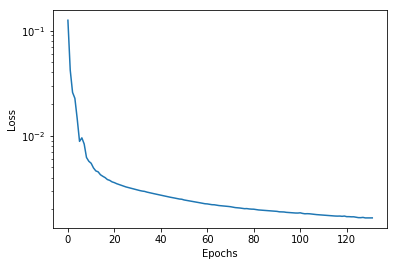

In [31]:
import matplotlib.pyplot as plt
fig = plt.figure()
epochs_cas = range(0,len(nn.loss_curve_))
loss_cas = nn.loss_curve_
plt.plot(epochs_cas,nn.loss_curve_)
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
fig.savefig('loss_history_cascades.png')

In [32]:
y_predicted_train_cas=nn.predict(x_train_cas)
y_predicted_train_cas=np.array(y_predicted_train_cas)
y_real_train_cas=np.array(y_train_cas)
y_predicted_train_cas.reshape([len(y_predicted_train_cas),1])
y_real_train_cas.reshape([len(y_real_train_cas),1])
np.savetxt('Predicted_train_cascades.txt',y_predicted_train_cas)
np.savetxt('Actual_train_cascades.txt',y_real_train_cas)
y_real_test_cas=np.array(y_test_cas)
y_predicted_test_cas = np.array(nn.predict(x_test_cas))
np.savetxt('Actual_test_cascades.txt',y_real_test_cas.reshape([len(y_real_test_cas),1]))
np.savetxt('Predicted_test_cascades.txt',y_predicted_test_cas.reshape([len(y_predicted_test_cas),1]))

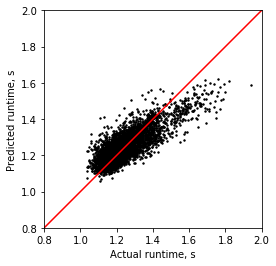

In [33]:
fig = plt.figure()
xyrange = [0.8,2.0]
plt.scatter(y_real_train_cas,y_predicted_train_cas,s=2,c='k')
plt.plot(xyrange,xyrange,'r')
plt.xlabel('Actual runtime, s')
plt.ylabel('Predicted runtime, s')
plt.axis('square')
plt.axis([xyrange[0],xyrange[1],xyrange[0],xyrange[1]])
plt.show()
fig.savefig('Cascades_training.png')

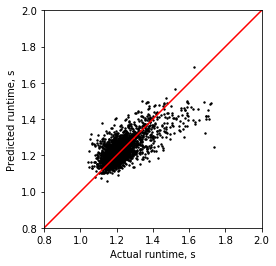

In [34]:
fig = plt.figure()
xyrange = [0.8,2.0]
plt.scatter(y_real_test_cas,y_predicted_test_cas,s=2,c='k')
plt.plot(xyrange,xyrange,'r')
plt.xlabel('Actual runtime, s')
plt.ylabel('Predicted runtime, s')
plt.axis('square')
plt.axis([xyrange[0],xyrange[1],xyrange[0],xyrange[1]])
plt.show()
fig.savefig('Cascades_testing.png')

In [35]:
data_new=pd.read_csv('training_newriver.txt', delimiter='\s+', index_col=False, header = None)

In [36]:
nn = MLPRegressor(
    hidden_layer_sizes=(80,3),  activation='relu', solver='adam', alpha=0.005, batch_size=400,
    learning_rate='adaptive', learning_rate_init=0.0009, power_t=0.7, max_iter=200, shuffle=True,
    random_state=9, tol=0.000001, verbose=True, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.25, beta_1=0.972, beta_2=0.9, epsilon=1e-9)

In [37]:
inputs_new=data_new.iloc[:,:14]
outputs_new=data_new.iloc[:,14]
print(inputs_new)
print(outputs_new)

        0    1     2    3     4    5     6    7     8    9     10   11    12  \
0     1000  320   700  256   700   96   600  288   100  256  1000  320   200   
1      400  192   100   64   100  256  1000  384   200   96   600  288  1000   
2      800  160   300  288   700  384   800  352   200  320   100  352   500   
3      700  288   200  352   100  192  1000  320   600  384   300  192   400   
4      300  256   200  384  1000  160   600  256   900   64  1000   64   500   
5      800   64   300   64   300  384   800  352   600  224   800  224   100   
6      700   96   300  224   400  352   500  192   600   32  1000   64   800   
7      500  160   800  288   500  384   300  128   600  128   800  384   500   
8      700  320  1000  288   700  352   900   32   500  288   600  160   500   
9      600  288   100  192   200   96   500  288   200   96   800  128   200   
10     700  320   300   64   900  224   700  320  1000   32   600  256   700   
11     300  384   900  352   500  384   

In [38]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(inputs_new, outputs_new, random_state=9)

In [39]:
print(len(x_train_new))
print(len(x_test_new))

7499
2500


In [40]:
scaler_new = StandardScaler()

In [41]:
scaler_new.fit(x_train_new)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
x_train_new = scaler_new.transform(x_train_new)
x_test_new = scaler_new.transform(x_test_new)

In [43]:
n_fit_new=nn.fit(x_train_new,y_train_new)

Iteration 1, loss = 0.13251758
Iteration 2, loss = 0.04286304
Iteration 3, loss = 0.02617427
Iteration 4, loss = 0.02243807
Iteration 5, loss = 0.01428101
Iteration 6, loss = 0.00807996
Iteration 7, loss = 0.00911610
Iteration 8, loss = 0.00789555
Iteration 9, loss = 0.00581828
Iteration 10, loss = 0.00495305
Iteration 11, loss = 0.00484165
Iteration 12, loss = 0.00413412
Iteration 13, loss = 0.00375827
Iteration 14, loss = 0.00360724
Iteration 15, loss = 0.00325729
Iteration 16, loss = 0.00309888
Iteration 17, loss = 0.00289361
Iteration 18, loss = 0.00274482
Iteration 19, loss = 0.00259540
Iteration 20, loss = 0.00246089
Iteration 21, loss = 0.00233948
Iteration 22, loss = 0.00224295
Iteration 23, loss = 0.00215839
Iteration 24, loss = 0.00208534
Iteration 25, loss = 0.00202145
Iteration 26, loss = 0.00195661
Iteration 27, loss = 0.00190838
Iteration 28, loss = 0.00185468
Iteration 29, loss = 0.00181185
Iteration 30, loss = 0.00176592
Iteration 31, loss = 0.00172930
Iteration 32, los

In [44]:
nn.score(x_train_new,y_train_new)
new_training_score = nn.score(x_train_new,y_train_new)

In [45]:
nn.score(x_test_new,y_test_new)
new_testing_score = nn.score(x_test_new,y_test_new)

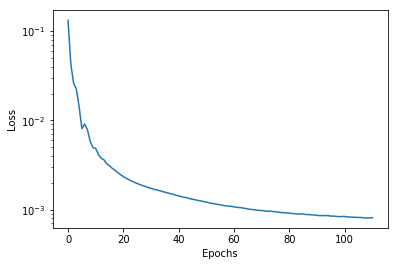

In [46]:
import matplotlib.pyplot as plt
fig = plt.figure()
epochs_new = range(0,len(nn.loss_curve_))
loss_new = nn.loss_curve_
plt.plot(epochs_new,nn.loss_curve_)
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
fig.savefig('loss_history_newriver.png')

In [47]:
y_predicted_train_new=nn.predict(x_train_new)
y_predicted_train_new=np.array(y_predicted_train_new)
y_real_train_new=np.array(y_train_new)
y_predicted_train_new.reshape([len(y_predicted_train_new),1])
y_real_train_new.reshape([len(y_real_train_new),1])
np.savetxt('Predicted_train_newriver.txt',y_predicted_train_new)
np.savetxt('Actual_train_newriver.txt',y_real_train_new)
y_real_test_new=np.array(y_test_new)
y_predicted_test_new = np.array(nn.predict(x_test_new))
np.savetxt('Actual_test_newriver.txt',y_real_test_new.reshape([len(y_real_test_new),1]))
np.savetxt('Predicted_test_newriver.txt',y_predicted_test_new.reshape([len(y_predicted_test_new),1]))

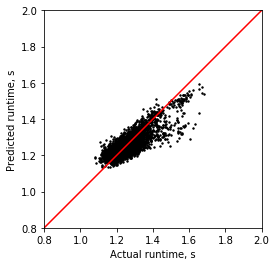

In [48]:
fig = plt.figure()
xyrange = [0.8,2.0]
plt.scatter(y_real_train_new,y_predicted_train_new,s=2,c='k')
plt.plot(xyrange,xyrange,'r')
plt.xlabel('Actual runtime, s')
plt.ylabel('Predicted runtime, s')
plt.axis('square')
plt.axis([xyrange[0],xyrange[1],xyrange[0],xyrange[1]])
plt.show()
fig.savefig('Newriver_training.png')

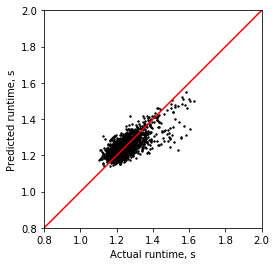

In [49]:
fig = plt.figure()
xyrange = [0.8,2.0]
plt.scatter(y_real_test_new,y_predicted_test_new,s=2,c='k')
plt.plot(xyrange,xyrange,'r')
plt.xlabel('Actual runtime, s')
plt.ylabel('Predicted runtime, s')
plt.axis('square')
plt.axis([xyrange[0],xyrange[1],xyrange[0],xyrange[1]])
plt.show()
fig.savefig('Newriver_testing.png')

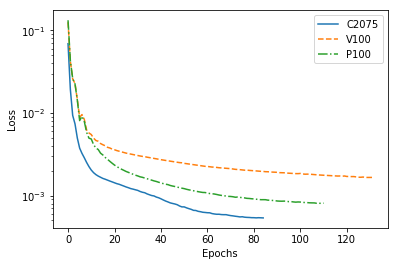

In [50]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(epochs,loss_thermisto,label='C2075',linestyle='-')
plt.plot(epochs_cas,loss_cas,label='V100',linestyle='--')
plt.plot(epochs_new,loss_new,label='P100',linestyle='-.')
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
fig.savefig('loss_history_threeGPUs.png')

In [51]:
data_com=pd.read_csv('training_combined.csv')

In [52]:
nn = MLPRegressor(
    hidden_layer_sizes=(80,3),  activation='relu', solver='adam', alpha=0.005, batch_size=400,
    learning_rate='adaptive', learning_rate_init=0.0009, power_t=0.7, max_iter=200, shuffle=True,
    random_state=9, tol=0.000001, verbose=True, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.25, beta_1=0.972, beta_2=0.9, epsilon=1e-9)

In [53]:
inputs_com=data_com.iloc[:,:15]
outputs_com=data_com.iloc[:,15] # or consider to use column 16
print(inputs_com)
print(outputs_com)

       inviscid_rhs_xi_limiter_g  inviscid_rhs_xi_limiter_v  \
0                           1000                        192   
1                            800                        160   
2                            400                        128   
3                            200                        256   
4                            100                        288   
5                            700                        224   
6                            800                        160   
7                           1000                         64   
8                            700                        288   
9                            600                         32   
10                           200                        384   
11                           900                        384   
12                           100                        224   
13                           700                        128   
14                           600                       

In [54]:
x_train_com, x_test_com, y_train_com, y_test_com = train_test_split(inputs_com, outputs_com, random_state=9)

In [55]:
print(len(x_train_com))
print(len(x_test_com))

22499
7500


In [56]:
scaler_com = StandardScaler()

In [57]:
scaler_com.fit(x_train_com)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [58]:
x_train_com = scaler_com.transform(x_train_com)
x_test_com = scaler_com.transform(x_test_com)

In [59]:
n_fit_com=nn.fit(x_train_com,y_train_com)

Iteration 1, loss = 0.02179662
Iteration 2, loss = 0.00632408
Iteration 3, loss = 0.00399026
Iteration 4, loss = 0.00314497
Iteration 5, loss = 0.00288352
Iteration 6, loss = 0.00270921
Iteration 7, loss = 0.00255725
Iteration 8, loss = 0.00244165
Iteration 9, loss = 0.00235096
Iteration 10, loss = 0.00227732
Iteration 11, loss = 0.00222570
Iteration 12, loss = 0.00217505
Iteration 13, loss = 0.00212660
Iteration 14, loss = 0.00208822
Iteration 15, loss = 0.00204020
Iteration 16, loss = 0.00200560
Iteration 17, loss = 0.00196992
Iteration 18, loss = 0.00193984
Iteration 19, loss = 0.00190708
Iteration 20, loss = 0.00187340
Iteration 21, loss = 0.00184927
Iteration 22, loss = 0.00181386
Iteration 23, loss = 0.00178461
Iteration 24, loss = 0.00174930
Iteration 25, loss = 0.00171956
Iteration 26, loss = 0.00168579
Iteration 27, loss = 0.00165597
Iteration 28, loss = 0.00163959
Iteration 29, loss = 0.00160957
Iteration 30, loss = 0.00158027
Iteration 31, loss = 0.00155612
Iteration 32, los

In [60]:
nn.score(x_train_com,y_train_com)
com_training_score = nn.score(x_train_com,y_train_com)

In [61]:
nn.score(x_test_com,y_test_com)
com_testing_score = nn.score(x_test_com,y_test_com)

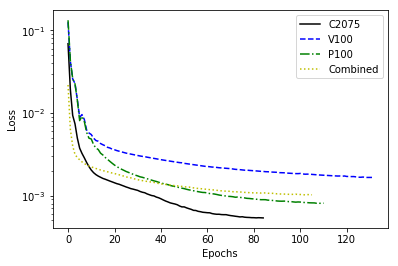

In [62]:
import matplotlib.pyplot as plt
fig = plt.figure()
epochs_com = range(0,len(nn.loss_curve_))
loss_com = nn.loss_curve_
plt.plot(epochs,loss_thermisto,label='C2075',linestyle='-',c='k')
plt.plot(epochs_cas,loss_cas,label='V100',linestyle='--',c='b')
plt.plot(epochs_new,loss_new,label='P100',linestyle='-.',c='g')
plt.plot(epochs_com,loss_com,label='Combined',linestyle=':',c='y')
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
fig.savefig('loss_history_combined.png')

In [63]:
y_predicted_train_com=nn.predict(x_train_com)
y_predicted_train_com=np.array(y_predicted_train_com)
y_real_train_com=np.array(y_train_com)
y_predicted_train_com.reshape([len(y_predicted_train_com),1])
y_real_train_com.reshape([len(y_real_train_com),1])
np.savetxt('Predicted_train_combined.txt',y_predicted_train_com)
np.savetxt('Actual_train_combined.txt',y_real_train_com)
y_real_test_com=np.array(y_test_com)
y_predicted_test_com = np.array(nn.predict(x_test_com))
np.savetxt('Actual_test_combined.txt',y_real_test_com.reshape([len(y_real_test_com),1]))
np.savetxt('Predicted_test_combined.txt',y_predicted_test_com.reshape([len(y_predicted_test_com),1]))

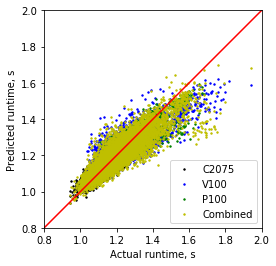

In [64]:
fig = plt.figure()
xyrange = [0.8,2.0]
plt.scatter(y_real_train,y_predicted_train,s=2,c='k',label='C2075')
plt.scatter(y_real_train_cas,y_predicted_train_cas,s=2,c='b',label='V100')
plt.scatter(y_real_train_new,y_predicted_train_new,s=2,c='g',label='P100')
plt.scatter(y_real_train_com,y_predicted_train_com,s=2,c='y',label='Combined')
plt.plot(xyrange,xyrange,'r')
plt.xlabel('Actual runtime, s')
plt.ylabel('Predicted runtime, s')
plt.legend(loc='lower right')
plt.axis('square')
plt.axis([xyrange[0],xyrange[1],xyrange[0],xyrange[1]])
plt.show()
fig.savefig('Combined_training.png')

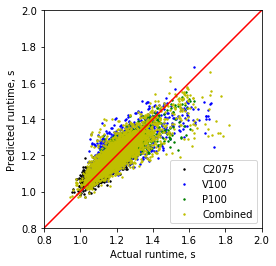

In [65]:
fig = plt.figure()
xyrange = [0.8,2.0]
plt.scatter(y_real_test,y_predicted_test,s=2,c='k',label='C2075')
plt.scatter(y_real_test_cas,y_predicted_test_cas,s=2,c='b',label='V100')
plt.scatter(y_real_test_new,y_predicted_test_new,s=2,c='g',label='P100')
plt.scatter(y_real_test_com,y_predicted_test_com,s=2,c='y',label='Combined')
plt.plot(xyrange,xyrange,'r')
plt.xlabel('Actual runtime, s')
plt.ylabel('Predicted runtime, s')
plt.legend(loc='lower right')
plt.axis('square')
plt.axis([xyrange[0],xyrange[1],xyrange[0],xyrange[1]])
plt.show()
fig.savefig('Combined_testing.png')

In [66]:
print(com_testing_score)

0.6698192116318773


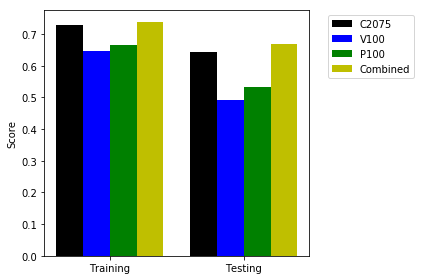

In [67]:
labels = ['Training', 'Testing']
C2075_score = [the_training_score, the_testing_score]
V100_score = [cas_training_score, cas_testing_score]
P100_score = [new_training_score, new_testing_score]
combined_score = [com_training_score, com_testing_score]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 3*width/2, C2075_score, width, label='C2075', color='k')
rects2 = ax.bar(x - width/2, V100_score, width, label='V100', color='b')
rects3 = ax.bar(x + width/2, P100_score, width, label='P100', color='g')
rects4 = ax.bar(x + 3*width/2, combined_score, width, label='Combined', color='y')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor=(1.05, 1),loc='upper left')

fig.tight_layout()

plt.show()
fig.savefig('Score.png')